## Observations and Insights

## Dependencies and starter code

In [ ]:
Observations:
    1. There are almost an equal amount of mice tested for each drug. Stelasyn has 124 mice, all others have 125.
    2. The distribution of male to female mice participating in the study was almost equal, with 125 males vs. 124 females.
    3. Mouse s185's tumor volume dropped significantly from the beginning of the trial. In 45 days, the tumor volume shrank by 18.3 mm3.
    4. There appears to be a positive coralation between mouse weight and tumor volume; the greater the weight, the greater the tumor volume. 
    

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [141]:
# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata, study_results, on="Mouse ID") 
combined_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [12]:
combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary statistics

In [98]:
combined_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#mean
tumor_volume_mean= combined_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_volume_mean.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [100]:
#median
tumor_volume_median=combined_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_volume_median.head(20)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [101]:
#variance
tumor_volume_variance=combined_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_volume_variance.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [102]:
#Look at regimen
regimen_count= combined_data['Drug Regimen'].value_counts()
regimen_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [103]:
#how many drug regimens are there?
reg_count=combined_data['Drug Regimen'].unique()
reg_count

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [104]:
mice_count=combined_data['Mouse ID'].nunique()
mice_count

249

In [105]:
#standard deviation
tumor_volume_std=combined_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_volume_std.head(15)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [106]:
#SEM
tumor_volume_sem=combined_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
tumor_volume_sem.head()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [107]:
#combine results into summary statistics table
summary_stat_tumor_volume=pd.DataFrame({'Mean': tumor_volume_mean, 'Median': tumor_volume_median, 'Variance': tumor_volume_variance, 'Standard Deviation': tumor_volume_std, 'SEM': tumor_volume_sem})

summary_stat_tumor_volume.head(15)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [108]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mice_on_regimen_data=combined_data.drop_duplicates(subset='Mouse ID', inplace=True)
mice_on_regimen=combined_data.groupby('Drug Regimen').count()['Mouse ID']
mice_on_regimen



Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [109]:
mice_on_regimen_df= pd.DataFrame({'Number of Mice': mice_on_regimen})
mice_on_regimen_df.reset_index(inplace= True)
mice_on_regimen_df

,Drug Regimen,Number of Mice
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,25
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


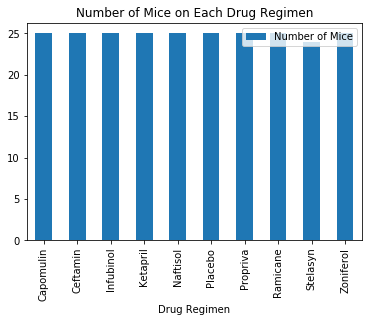

In [110]:
mice_and_regimen_pandas=mice_on_regimen_df[['Drug Regimen', 'Number of Mice']]
mice_and_regimen_pandas=mice_and_regimen_pandas.set_index('Drug Regimen')
mice_and_regimen_pandas.plot(kind='bar')
plt.title("Number of Mice on Each Drug Regimen")
plt.show()

In [111]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
mice_on_regimen_df.shape

(10, 2)

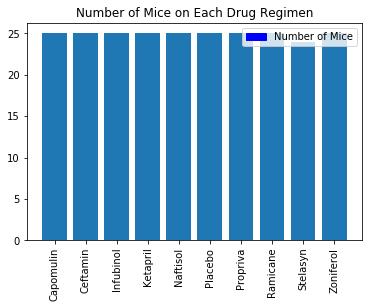

In [112]:

objects = ('Capomulin','Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol')
y_pos = np.arange(len(objects))
mice = [25, 25, 25, 25, 25, 25, 25, 25, 24, 25]

plt.bar(y_pos, mice, align='center', alpha=1)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('')
plt.title('Number of Mice on Each Drug Regimen')
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='Number of Mice')
plt.legend(handles=[blue_patch])

plt.show()

## Pie plots

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_of_mice_group=combined_data.groupby('Sex').count()['Mouse ID']
sex_of_mice_df= pd.DataFrame({'Number of Mice': sex_of_mice_group})
sex_of_mice_df.reset_index(inplace= True)
sex_of_mice_df

,Sex,Number of Mice
0,Female,124
1,Male,125


Text(0, 0.5, '')

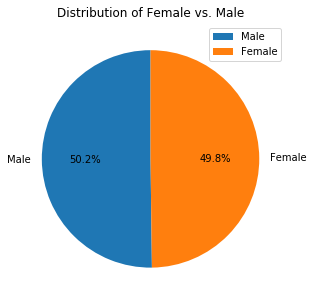

In [114]:
sex_of_mice_df=pd.DataFrame({'Number of Mice': [125, 124],},
                  index=['Male', 'Female'])
plot = sex_of_mice_df.plot.pie(y= 'Number of Mice', figsize=(5, 5), autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs. Male")
plot.set_ylabel('')


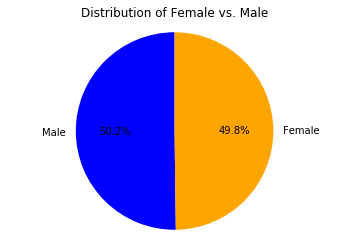

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=["Male", "Female"]
sex_count=["125", "124"]
colors=['blue', 'orange']
plt.title('Distribution of Female vs. Male')
plt.pie(sex_count, labels=sex, colors=colors, autopct="%1.1f%%", shadow=False, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#ftv_group= combined_data.groupby('Mouse ID').max()

#max_Cap_df = ftv_group.loc[(ftv_group["Drug Regimen"] == "Capomulin"),:]
#max_Cap_df

#ftv_df=pd.merge(combined_data, ftv_group, on=["Mouse ID", "Timepoint"], how='left')
#ftv_df.head(10)

# First create a subset of the combined_data dataframe where 'Drug Regimen' is
#in [Capomulin, Ramicane, Infubinol, and Ceftamin]
# Create a list of the four drugs to examine
#four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Slice the original combined_data dataframe using the list of four drugs
#four_drugs = combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]
# View the newly created subset dataframe
#four_drugs.head()
# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
#four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\Last_tumor_size=('Tumor Volume (mm3)',lambda x:x.iloc[-1])).round(3)
# Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
#Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1]).round(3)
# View the groupby dataframe
#four_last_tumor

#four_drug_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#four_drugs=combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]
#four_last_tumor=four_drugs.groupby(['Drug Regimen', 'Mouse ID']).agg(\Last_tumor_size=('Tumor Volume (mm3)', lambda x:x.iloc[-1])).round(3)
#four_last_tumor


#drugR_df = ftv_df.loc[(ftv_df["Drug Regimen_x"] == "Ramicane") & (ftv_df["Timepoint"]),:]
#drugR_df.head()

#quartiles = temperatures.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [151]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Create a new dataframe for mice on Capomulin
mice_on_capomulin=combined_data.iloc[11:19, :]
mice_on_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1


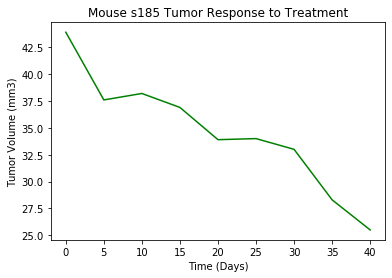

In [157]:
#plot mouse s185 timepoint vs tumor volume
timepoint=np.array([0,5,10,15,20,25,30,35,40])
tumorvol=np.array([43.9,37.6,38.2,36.9,33.9,34.0,33.0,28.3,25.5])
plt.plot(timepoint, tumorvol, color='g')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse s185 Tumor Response to Treatment')
plt.show()


In [95]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df=combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
mouse_weight=capomulin_df.groupby('Mouse ID').mean()
mouse_weight



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


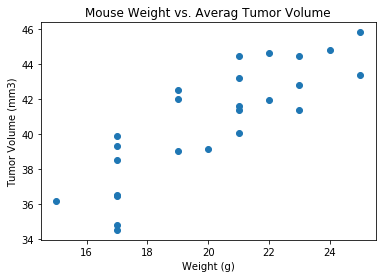

In [159]:
plt.scatter(mouse_weight['Weight (g)'], mouse_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Averag Tumor Volume')
plt.show()

(0.8419363424694717, 1.322572243471279e-07)


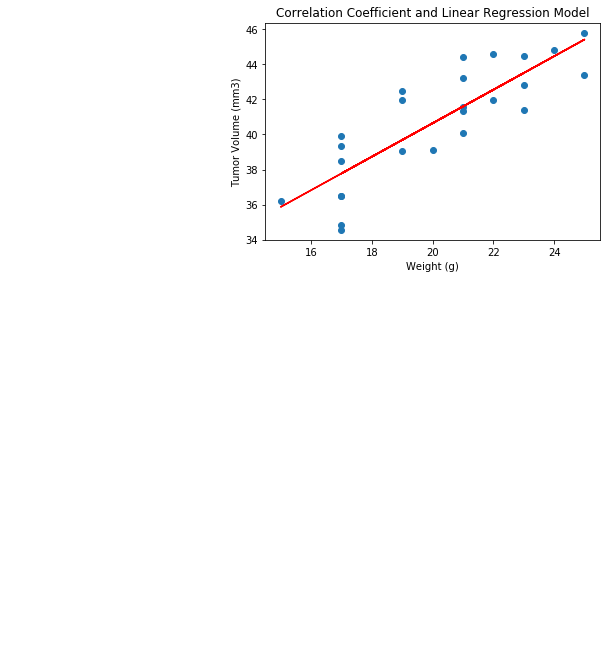

In [160]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight['Weight (g)']
y_values = mouse_weight['Tumor Volume (mm3)']

correlation = st.pearsonr(x_values,y_values)
print(correlation) #PRINT 'THIS IS.....MAKE NICE'

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Correlation Coefficient and Linear Regression Model')
plt.show()




